## **Sentiment Analysis**

In [175]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [176]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Embedding, LSTM, Conv1D, Dropout, MaxPooling1D, BatchNormalization, Bidirectional

**Read Data**

In [177]:
with open('dataset.json',encoding='utf-8-sig', errors='ignore') as file:
    json_file = json.load(file)

In [178]:
data = pd.DataFrame(json_file)
data.head()

,comment,sentiment
0,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...,1
1,خوبه ولی روی موهای من تاثیر زیادی نداشت,0
2,نخرید رنگش در میاد به دست,1
3,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...,0
4,هفته پیش گرفتم.ظاهرش خیلی خوبه ولی بعده ۴ ۵ رو...,1


In [179]:
data.shape

(3200, 2)

In [180]:
data.sentiment.unique()

array([1, 0])

In [181]:
data.sentiment.value_counts()

0    2500
1     700
Name: sentiment, dtype: int64

In [182]:
Y = data['sentiment']

In [183]:
data['sentence_no_punctuation'] = data['comment'].str.replace('[^\w\s]','')
data['sentence_no_punctuation'] = data["sentence_no_punctuation"].fillna("fillna")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [184]:
data.head()

,comment,sentiment,sentence_no_punctuation
0,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...,1,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...
1,خوبه ولی روی موهای من تاثیر زیادی نداشت,0,خوبه ولی روی موهای من تاثیر زیادی نداشت
2,نخرید رنگش در میاد به دست,1,نخرید رنگش در میاد به دست
3,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...,0,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...
4,هفته پیش گرفتم.ظاهرش خیلی خوبه ولی بعده ۴ ۵ رو...,1,هفته پیش گرفتمظاهرش خیلی خوبه ولی بعده ۴ ۵ روز...


In [186]:
max_features = 5000
maxlen = 40

In [187]:
tokenizer = Tokenizer(num_words = max_features)

In [188]:
# Convert pandas to numpy
np_data = data["sentence_no_punctuation"].values

In [189]:
np_data

array(['باید کلی بشوری تا از روی صورت پاک بشه بویه ملایمی هم داره  پوست من   مختلطه مخصوص پوست های خشک و معمولیشو گرفتم که زیاد قوی نباشه و پوستمو خشک نکنه الان ۶ ماه دارمش اوایلش راضی بودم اما بعد از مدتی دیدم دور چشمام داره چروکهای خیلی ریز میفته دیگه ۳۴ روز یه بار ازش استفاده میکنم اونم فقط روی قسمته چرب پوستم',
       'خوبه ولی روی موهای من تاثیر زیادی نداشت',
       'نخرید رنگش در میاد به دست', ...,
       'خوبه به بدن نمیچسبه برعکس به لباس خوب می چسبه دوامش هم خوبه',
       'من برای خودم و مادربزرگم گرفتم',
       'خیلی خوبه مرسی دیجی کالا خیلی خوب جی تی ای بازی میکنم باهاش'],
      dtype=object)

## **Install hazm library**

In [190]:
# install hazm library
!pip install hazm
from hazm import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
def read_stop_words(filename):
  with open(filename) as stopwords_file:
    stopwords = stopwords_file.readlines()
  stopwords = [line.replace('\n', '') for line in stopwords] 
  return stopwords

In [192]:
stopwords = read_stop_words('stopwords.txt')
print(len(stopwords))

1316


In [193]:
word_tokenized = [word_tokenize(t) for t in np_data]
word_tokenized_filtered = [[w for w in sentence if w not in stopwords] for sentence in word_tokenized]

In [194]:
word_tokenized_filtered[0:5]

[['بشوری',
  'پاک',
  'بشه',
  'بویه',
  'ملایمی',
  'داره',
  'پوست',
  'مختلطه',
  'مخصوص',
  'پوست',
  'خشک',
  'معمولیشو',
  'قوی',
  'نباشه',
  'پوستمو',
  'خشک',
  'نکنه',
  'ماه',
  'دارمش',
  'اوایلش',
  'راضی',
  'مدتی',
  'دیدم',
  'دور',
  'چشمام',
  'داره',
  'چروکهای',
  'ریز',
  'میفته',
  '۳۴',
  'اونم',
  'قسمته',
  'چرب',
  'پوستم'],
 ['خوبه', 'موهای', 'تاثیر', 'زیادی'],
 ['نخرید', 'رنگش', 'میاد', 'دست'],
 ['بوی', 'خوبی', 'داره', 'تمیز', 'میکنه', 'اسکراب', 'قوی'],
 ['هفته',
  'گرفتمظاهرش',
  'خوبه',
  'بعده',
  'دوره',
  'لبش',
  'شکست۵',
  'کار',
  'کنهو',
  'توصیه']]

In [195]:
tokenizer.fit_on_texts(word_tokenized_filtered)

In [196]:
print(tokenizer.word_index)


{'داره': 1, 'کیفیت': 2, 'خوبه': 3, 'عالی': 4, 'پوست': 5, 'خوبی': 6, 'میشه': 7, 'میکنه': 8, 'عالیه': 9, 'خریدم': 10, 'کابل': 11, 'قیمت': 12, 'کرم': 13, 'راضی': 14, 'نسبت': 15, 'محصول': 16, 'پیشنهاد': 17, 'گوشی': 18, 'قیمتش': 19, 'نداره': 20, 'شارژ': 21, 'مناسب': 22, 'خشک': 23, 'کالا': 24, 'نظر': 25, 'رنگ': 26, 'کار': 27, 'دیجی': 28, 'راضیم': 29, 'نرم': 30, 'خرید': 31, 'خوبیه': 32, 'مو': 33, 'بوی': 34, 'چرب': 35, 'جوش': 36, 'جنس': 37, 'میده': 38, 'پاک': 39, 'العاده': 40, 'نمیکنه': 41, 'پوستم': 42, 'ارزش': 43, 'باشه': 44, 'سلام': 45, 'قاب': 46, 'شامپو': 47, 'هستش': 48, 'نمیشه': 49, 'توجه': 50, 'دستم': 51, 'موهای': 52, 'ماه': 53, 'شگفت': 54, 'ضد': 55, 'محصولات': 56, 'سفارش': 57, 'هفته': 58, 'دور': 59, 'ماسک': 60, 'دوستان': 61, 'موهام': 62, 'انگیز': 63, 'کنندگی': 64, 'کیفیتش': 65, 'کاور': 66, 'جذب': 67, 'تاثیر': 68, 'دست': 69, 'سه': 70, 'توصیه': 71, 'حس': 72, 'نظرم': 73, 'خریدش': 74, 'بخرید': 75, 'بشه': 76, 'حالت': 77, 'سرعت': 78, 'مدل': 79, 'مناسبه': 80, 'واسه': 81, 'بسته': 82, 'مرطوب': 83

In [197]:
vocab_size = len(tokenizer.word_index)+1

In [198]:
vocab_size

5667

In [199]:
data = tokenizer.texts_to_sequences(word_tokenized_filtered)

In [200]:
data[0:5]

[[2234,
  39,
  76,
  1491,
  549,
  1,
  5,
  805,
  375,
  5,
  23,
  2235,
  179,
  684,
  437,
  23,
  806,
  53,
  550,
  2236,
  14,
  478,
  113,
  59,
  1134,
  1,
  2237,
  307,
  945,
  2238,
  479,
  1492,
  35,
  42],
 [3, 52, 68, 98],
 [192, 106, 170, 69],
 [34, 6, 1, 111, 8, 376, 179],
 [58, 2239, 3, 1493, 1494, 2240, 2241, 27, 2242, 71]]

In [201]:
data = pad_sequences(data, maxlen = maxlen)

In [202]:
data

array([[   0,    0,    0, ..., 1492,   35,   42],
       [   0,    0,    0, ...,   52,   68,   98],
       [   0,    0,    0, ...,  106,  170,   69],
       ...,
       [   0,    0,    0, ..., 1479, 1236,    3],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  857,  718,  146]], dtype=int32)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

**Read Stop-Words**

In [205]:
maxlen

40

In [206]:
i = Input(shape=(maxlen,))
x = Embedding(vocab_size, 50, input_length=maxlen)(i)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv1D(32, 5, padding='same', activation='relu')(x)
x = Dropout(0.3)(x)
x = MaxPooling1D(2)(x)
x = Bidirectional(LSTM(128,return_sequences=True))(x)
x = LSTM(64)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [207]:
model = Model(i, x)

In [208]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [209]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 40)]              0         
                                                                 
 embedding_21 (Embedding)    (None, 40, 50)            283350    
                                                                 
 batch_normalization_7 (Batc  (None, 40, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_41 (Dropout)        (None, 40, 50)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 40, 32)            8032      
                                                                 
 dropout_42 (Dropout)        (None, 40, 32)            0         
                                                          

In [210]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=32)

Epoch 1/7
70/70 [==============================] - 11s 82ms/step - loss: 0.5279 - accuracy: 0.7750 - val_loss: 0.6329 - val_accuracy: 0.7885
Epoch 2/7
70/70 [==============================] - 4s 64ms/step - loss: 0.3808 - accuracy: 0.8406 - val_loss: 0.6455 - val_accuracy: 0.7271
Epoch 3/7
70/70 [==============================] - 4s 64ms/step - loss: 0.2209 - accuracy: 0.9192 - val_loss: 0.5150 - val_accuracy: 0.8240
Epoch 4/7
70/70 [==============================] - 4s 64ms/step - loss: 0.1456 - accuracy: 0.9509 - val_loss: 0.4535 - val_accuracy: 0.8333
Epoch 5/7
70/70 [==============================] - 4s 63ms/step - loss: 0.0964 - accuracy: 0.9679 - val_loss: 0.4022 - val_accuracy: 0.8333
Epoch 6/7
70/70 [==============================] - 4s 62ms/step - loss: 0.0771 - accuracy: 0.9710 - val_loss: 0.4223 - val_accuracy: 0.8281
Epoch 7/7
70/70 [==============================] - 4s 63ms/step - loss: 0.0808 - accuracy: 0.9728 - val_loss: 0.4706 - val_accuracy: 0.8260


In [212]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

30/30 [==============================] - 1s 19ms/step - loss: 0.4706 - accuracy: 0.8260
Accuracy: 82.60%


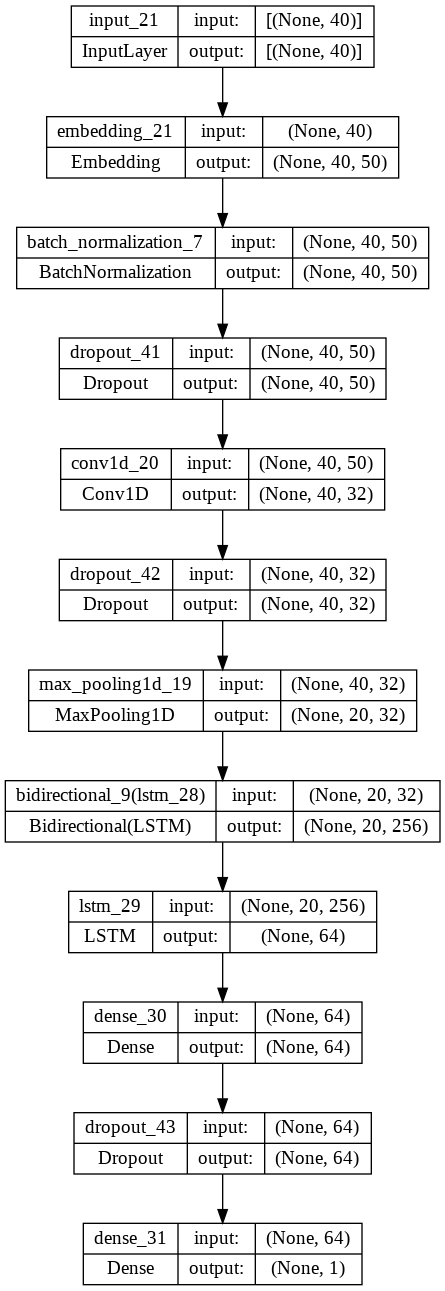

In [213]:
plot_model(model, show_shapes=True)

In [214]:
def plot_graphs(history, string):
    pyplot.plot(history.history[string])
    pyplot.plot(history.history['val_'+string])
    pyplot.xlabel("Epochs")
    pyplot.ylabel(string)
    pyplot.legend([string, 'val_'+string])
    pyplot.show()

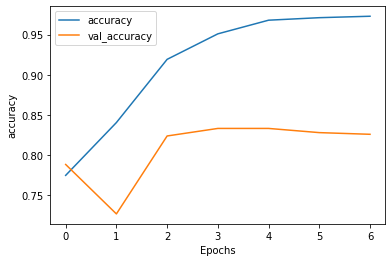

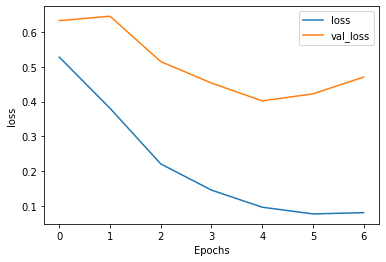

In [215]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [216]:
positive_sentence = "من تو‌ پیشنهاد ویژه گرفتم. خوب بود"
negative_sentence = "الیاف این مسواک از کیفیت خوبی برخوردار نبوده و با هر بار مسواک زدن نیز از جای خود کنده میشد"
positive_sentence2 = "خیلی عالی بود"
negative_sentence2 = "اصلا پیشنهاد نمیکنم پولتون و بابتش بدید"

In [217]:
def prediction(sentence):
  data = tokenizer.texts_to_sequences([sentence])
  data_pad_sequence = pad_sequences(data, maxlen = maxlen)
  perdiction = model.predict(data_pad_sequence)
  print(perdiction[0])
  if perdiction[0][0] > 0.5:
    return "negative"
  else: 
    return "positive"  

In [218]:
prediction(negative_sentence2)

1/1 [==============================] - 1s 1s/step
[0.99088544]


'negative'